## 1-1. 🐶 거울아 거울아, 나는 멍멍이 상이니, 아니면 냥이 상이니?

### 학습 내용

2 ~ 7. 내가 직접 만드는 강아지 고양이 분류기

직접 모델 구조를 설계하여, 강아지 고양이 분류기 모델을 만듭니다.

8 ~ 13. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기

Transfer Learning을 사용해서, 강아지 고양이 분류기 모델을 만듭니다.

### 학습 목표

이미지를 분류할 때 이미 잘 학습되어 있는 모델을 사용한다는 아이디어를 떠올릴 수 있습니다.

사전학습 모델인 Backbone 모델의 종류와 개념을 알고, Transfer Learning의 개념을 설명할 수 있습니다.

VGG, ResNet과 같은 기본적인 Backbone 모델을 불러와서 사용할 수 있습니다.

Backbone 모델을 원하는 레이어(layer)만큼 새로 학습시켜서 사용할 수 있습니다.

Backbone 모델을 Transfer Learning 시킴으로써 원하는 이미지를 분류시킬 수 있습니다.

❗실습 전 한 가지 주의할 점!

실습 중 관련 패키지 버전 등의 이유로 경고 메시지가 출력될 수 있습니다.

아래 코드를 실행해 꼭 필요한 메시지 외 경고 메시지가 출력되지 않도록 해주세요.

In [1]:
import warnings
warnings.filterwarnings("ignore")

print("완료!")

완료!


## 1-2. 내가 직접 만드는 강아지 고양이 분류기 (1) 이미지 분류 문제

앞으로 이미지를 넣었을 때 강아지인지, 고양이인지 분류하는 모델을 만들 것입니다.

텐서플로우(TensorFlow)를 활용해서 이미지를 분류할 수 있는 모델을 설계해 보겠습니다.

다음 코드를 실행해볼까요?

In [2]:
import tensorflow as tf
print(tf.__version__)

2023-09-09 03:04:25.678315: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.13.0


## 1-3. 내가 직접 만드는 강아지 고양이 분류기 (2) 모델이 학습하려면? 공부할 데이터를 줘야지!

### 모델 학습을 위한 데이터셋(dataset) 준비하기

가장 먼저 강아지와 고양이 이미지 데이터가 필요하겠죠! 텐서플로우에서 제공하는 데이터셋을 사용할 것입니다.

클라우드 사용자는 tensorflow_datasets 패키지가 이미 설치되어 있으므로 바로 패키지를 로드해 보겠습니다.

In [3]:
import tensorflow_datasets as tfds

tfds.__version__

'4.9.2'

tensorflow_datasets는 텐서플로우가 제공하는 데이터셋 모음집입니다. 우리에게 필요한 강아지와 고양이 이미지뿐만 아니라 음성 데이터셋, 이미지 데이터셋, 텍스트 데이터셋 등 방대한 종류의 데이터셋을 제공하죠.

다음 링크에서 tensorflow_datasets에 관한 세부 내용을 확인할 수 있습니다.

https://www.tensorflow.org/datasets/catalog/overview

Q. tensorflow_datasets에서 제공되는 데이터셋은 크게 8가지 범주가 있습니다. 이들은 무엇인가요?

Audio, Image, Object_detection, Structured, Summarization, Text, Translate, Video

Q. 위 8가지 데이터 범주 중 Structured 데이터는 어떤 데이터를 말하는걸까요? 확인해 보고 답을 생각해봅시다.

Structured 데이터란 행과 열이 있는 2차원 형태의 표 데이터로, 다른 말로는 정형 데이터라고 하기도 한다. 각 행은 하나의 데이터 포인트들을 나타내고, 각 열은 각 데이터 포인트의 특징들을 나타낸다.

tensorflow_datasets 라이브러리를 tfds로 가져왔으니, 그 중 cats_vs_dogs 데이터를 사용해 보겠습니다. cats_vs_dogs 데이터에 대한 정보는 다음에서 확인해볼 수 있습니다.

https://www.tensorflow.org/datasets/catalog/cats_vs_dogs

Q. 데이터의 용량은 몇 MiB인가요? 데이터는 총 몇 개의 examples로 이루어져있나요?

786.68 MiB 23,262장

데이터는 약 2만 장으로 이루어져 있군요.

그럼 데이터를 가져와 보죠. 다음 코드를 실행시켜봅시다.

In [4]:
pwd

'/Users/ralphpark/PycharmProjects/aiffel5_quest/exploration'

In [8]:
!ln -s ~/ralphpark/PycharmProjects/aiffel5_quest/exploration/data/* ~/ralphpark/PycharmProjects/aiffel5_quest/exploration/aiffel/cats_vs_dogs/

ln: failed to create symbolic link '/root/ralphpark/PycharmProjects/aiffel5_quest/exploration/aiffel/cats_vs_dogs/': No such file or directory


In [4]:
# (raw_train, raw_validation, raw_test), metadata = tfds.load(
#     name='cats_vs_dogs',
#     split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
#     data_dir='~/PycharmProjects/aiffel5_quest/exploration/aiffel/cats_vs_dogs/',
#     download=False,
#     with_info=True,
#     as_supervised=True,
# )

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    name='cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    data_dir='/tmp/FyZbnpwUqT/aiffel/cats_vs_dogs/',
    download=False,
    with_info=True,
    as_supervised=True,
)

Q. 위 코드에서 split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'] 는 무엇을 의미할까요?

전체 train 데이터셋으로 설정되어 있는 데이터셋을 80%, 10%, 10% 세 부분으로 나누어 각각 train_data, validation_data, test_data로 사용하겠다는 의미이다.

데이터셋이 모두 잘 다운받아졌나요? 그렇다면 각각의 데이터셋을 확인해 봅시다.

In [5]:
print(raw_train)
print(raw_validation)
print(raw_test)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


각 데이터셋의 형태가 잘 출력되었군요.

모든 데이터셋은 (image, label)의 형태를 가집니다. ((None, None, 3), ())가 이를 나타내죠. 여기에서 앞에 있는 (None, None, 3)은 image의 shape를, 뒤의 ()는 정답 카테고리인 label의 shape를 의미합니다.

이미지는 (height, width, channel)로 3차원 데이터이기 때문에 (None, None, 3)과 같이 나타났습니다. 이때 height와 width가 None으로 나타난 이유는 무엇일까요?

잠시 뒤에 확인하겠지만, 모든 이미지의 크기가 전부 다르기 때문입니다. 정해져 있지 않은 사이즈이기 때문에 None으로 나타낸 거죠.

그렇다면 3이라는 숫자는 무엇을 나타낼까요?

이미지의 색을 표현하는 채널의 수를 나타냅니다. 컬러 이미지의 경우, 색은 RGB의 세 가지 색 조합으로 나타낼 수 있다는 것을 알고 있을 겁니다. 이미지를 컴퓨터상에 나타낼 때, 각 픽셀(pixel)의 색은 RGB의 세 가지 색의 조합으로 나타나기 때문에 컬러 이미지는 항상 3개의 채널을 가지고 있어야 하죠.
반면, 흑백 이미지는 white/black만 나타내면 되므로 단 하나의 채널만 있어도 충분합니다.

label은 특정 이미지가 강아지인지, 혹은 고양이인지를 나타내는 단일 값입니다. 단순히 1차원의 숫자 하나로 표현될 수 있기 때문에 차원이 따로 나타나지 않았습니다.

## 1-4. 내가 직접 만드는 강아지 고양이 분류기 (3) 데이터가 있다고 끝은 아니야, 이쁘게 다듬는 작업은 필수!

### 데이터 시각화를 통해 확인하고, 모델에 입력할 수 있는 형태로 전처리하기

데이터에 대한 설명은 이 정도면 충분한 것 같으니, 바로 데이터를 직접 확인해봅시다. 일단 데이터를 확인하기 위해 matplotlib 라이브러리를 가져오겠습니다.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

print("슝~")

슝~


raw_train 안에 있는 데이터를 확인해 보기 위해 tf.data.Dataset에서 제공하는 take라는 함수를 사용해 보겠습니다. 이 함수는 인수로 받은 만큼의 개수만큼의 데이터를 추출하여 새로운 데이터셋 인스턴스를 생성하여 리턴하는 함수입니다.

그럼 바로 다음 코드를 실행 시켜 보세요.

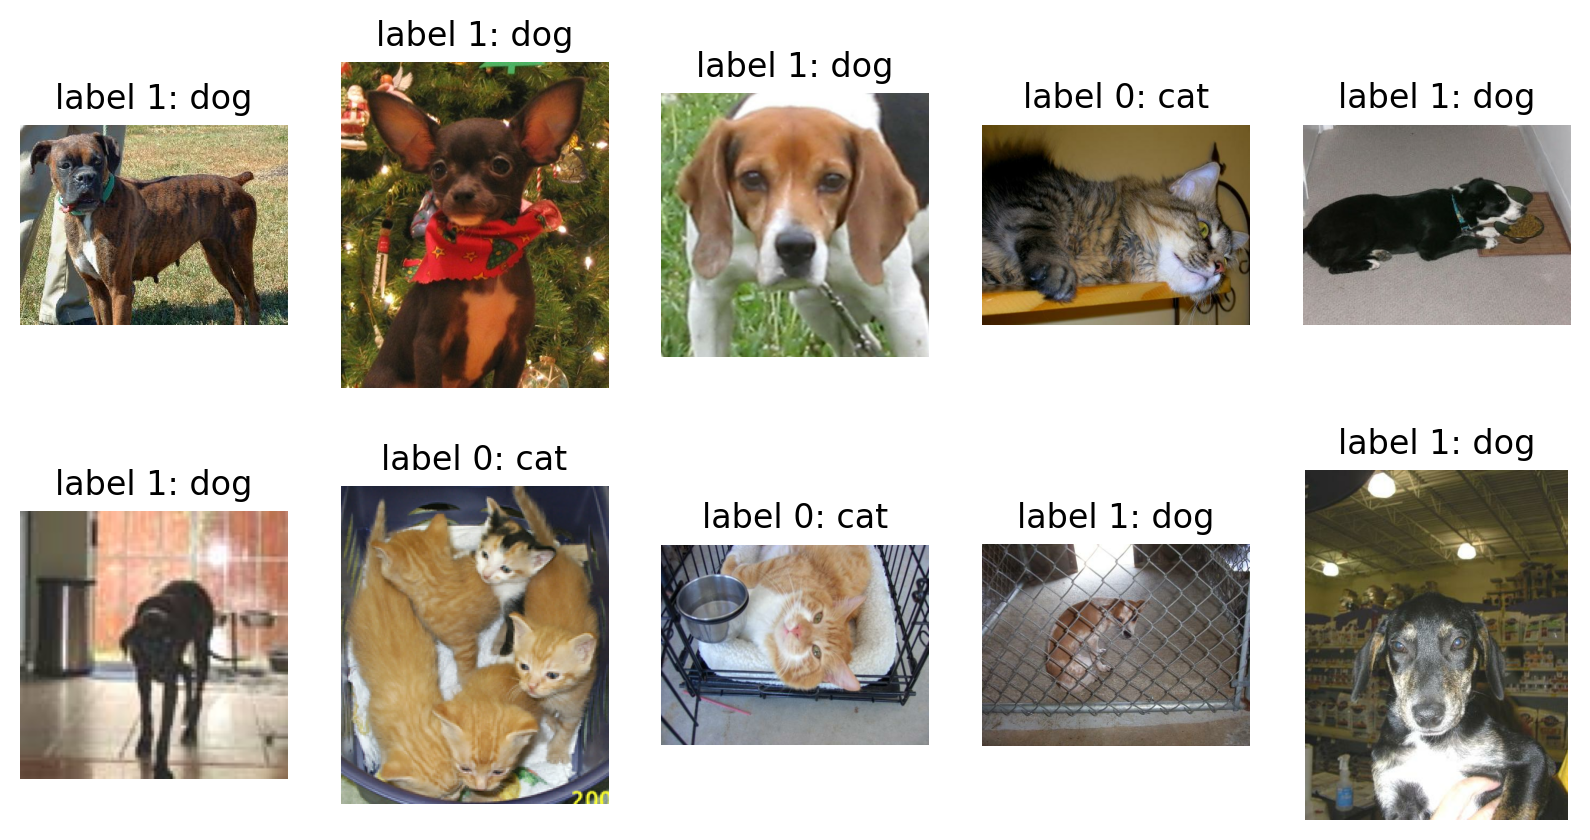

In [ ]:
plt.figure(figsize=(10, 5))

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(raw_train.take(10)):  # 10개의 데이터를 가져 옵니다.
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

0장의 사진을 확인해 보니 귀여운 강아지와 고양이 이미지들이 잘 섞여 있네요!

강아지는 label 1로, 고양이는 label 0으로 설정되어 있군요. 앞서 설명했듯 이미지의 사이즈는 전부 제각각이네요. 모델을 학습시킬 때에는 이미지 사이즈를 통일시켜 주는 작업을 해야할 것 같습니다.

format_example() 함수를 이용해 이미지를 같은 포맷으로 통일 시켜 봅시다.

아래 코드는 이미지의 사이즈를 160x160 픽셀로 통일시킬 뿐만 아니라, 각 픽셀값의 scale을 수정해주는 역할도 합니다.

‍🌈 간단 상식 - 타입캐스팅(Type Casting)

형변환이라고도 불리는 타입개스팅은 다른 데이터 타입으로 형(타입)을 바꿔주는 것을 의미합니다. 정수형을 실수형으로 바꾸기 위해 float()를 사용하는 것이 타입캐스팅의 한 예입니다.

In [ ]:
IMG_SIZE = 160 # 리사이징할 이미지의 크기

def format_example(image, label):
    image = tf.cast(image, tf.float32)  # image=float(image)같은 타입캐스팅의  텐서플로우 버전입니다.
    image = (image/127.5) - 1 # 픽셀값의 scale 수정
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

print("슝~")

Q. 원래 이미지의 각 픽셀값은 RGB 색을 나타낼 때 주로 쓰이는 0~255 사이의 정수값이었습니다. 위 코드를 실행시키면 각 픽셀 값의 범위는 어떻게 변하게 될까요?

0 ~ 255 사이의 값들을 그 중간값인 127.5로 나누고 1을 뺐으므로, -1 ~ 1 사이의 실수값이 된다.'


그럼 이제 format_example() 함수를 raw_train, raw_validation, raw_test 에 map() 함수로 적용시켜서 원하는 모양의 train, validataion, test 데이터셋으로 변환해 보겠습니다. 리스트 원소 전체에 동일한 변환 함수를 for 문을 사용하지 않고 손쉽게 적용하게 해주는 map 함수에 대해서 빠르게 아래 코드로 알아봅시다.

map은 리스트의 요소를 지정된 함수로 처리해주는 함수입니다.

In [ ]:
a = [1.2, 2.5, 3.7, 4.6]
a = list(map(int, a))# 리스트의 요소를 정수로 변환 하여 리스트로 생성
a

Q. map함수를 사용해서 0~9까지 숫자를 문자열(str을 사용)로 변환하여 리스트로 출력해보세요.


In [ ]:
b = [0,1,2,3,4,5,6,7,8,9]
b = list(map(str,b))
b

map에 int와 리스트를 넣으면 리스트의 모든 요소를 int를 사용해서 변환합니다. 그다음에 list를 사용해서 map의 결과를 다시 리스트로 만들어줍니다.

b 는 range로 0부터 9까지 숫자를 만들고, str을 이용해서 모두 문자열로 변환했습니다. 리스트를 출력해보면 각 요소가 ' '(작은따옴표)로 묶인 것을 볼 수 있습니다.

In [ ]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

print(train)
print(validation)
print(test)

<_MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


IMG_SIZE를 160으로 지정해 줌으로써, 모든 이미지의 크기를 (160, 160, 3)으로 통일시켰습니다.

Q7. (160, 160, 3) 의 160, 160, 3은 각각 무엇을 의미하나요?

첫 번째 160은 이미지의 height, 즉 높이를, 두 번째 160은 이미지의 width, 즉 너비를, 그리고 마지막 3은 이미지의 channel의 수를 나타내며, 그 수는 RGB의 3이다.

다시 이미지를 시각적으로 확인해 봅시다.

Q8. 위에서 이미지를 확인했던 코드와 아래 코드는 어떻게 다를까요? 두 가지 부분을 찾아 설명해봅시다.

raw_train을 train으로 바꾸었다.
matplotlib으로 이미지를 시각화 할 경우에는 모든 픽셀값이 양수여야 하므로, -1~1 사이의 픽셀값을 1을 더한 후 2로 나눠서 0~1 사이의 값으로 변환하였다.

In [ ]:
plt.figure(figsize=(10, 5))


get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(train.take(10)):
    plt.subplot(2, 5, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

다시 이미지를 시각적으로 확인해 다시 확인해 보니 모든 이미지의 크기가 균일해진 것을 확인할 수 있습니다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

print("슝~")

In [ ]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=2, activation='softmax')
])

print("슝~")

Q.위 코드에서 사용되는 Conv2D 클래스의 인자들이 무엇을 뜻하나요?

filters = filter의 수

kernel_size = filter의 크기(3 대신 (3,3) 형태로 작성해도 같은 의미)

padding = same은 입력과 출력의 사이즈를 동일하게 맞춥니다.

activation = 사용할 활성화 함수

이 외에도 strides, use_bias 등의 파라미터를 설정할 수 있습니다.

모델의 전체 구조를 summary로 확인해봅시다.

In [ ]:
model.summary()

summary() 메소드는 모델의 전체 구조를 한눈에 보여줍니다.

앞서 말했듯이, 딥러닝 모델은 레이어가 층층이 쌓인 구조입니다. 저희가 모델에 입력하는 이미지의 크기가 몇이었죠?

네, (160, 160, 3)임을 이전에 확인했습니다.

summary()에서 출력된 표는 (160, 160, 3) 크기의 이미지가 모델에 입력된 후 각 레이어를 지나면서 그 이미지의 사이즈가 어떻게 변화하는지를 나타내주고 있습니다. 처음 6개의 레이어를 지나고 난 후의 shape는 모두 (None, height, width, channel) 로 4차원입니다.

Q9. 이미지는 summary에 나타난 레이어를 위에서부터 차례로 지나게 됩니다. 이미지는 첫 번째 레이어인 conv2d부터 여섯 번째 레이어인 max_pooling2d_2까지 지나면서 height, width, channel이 어떻게 변화하고 있나요?

height와 width는 160 → 80 → 40 → 20 으로 점점 작아지고, channel은 16 → 32 → 64까지 커지고 있다.


첫 번째 차원은 데이터의 개수를 나타냅니다. 여기서는 정해지지 않은 수라는 None 기호로 표시되었네요. None은 배치(batch) 사이즈에 따라 모델에 다른 수의 입력이 들어올 수 있음을 나타냅니다.

데이터 하나의 크기는 (height, width, channel)로 3차원이죠. 6개의 레이어를 지나면서 height와 width는 점점 작아지고, channel은 점점 커지다가, flatten 계층을 만나 25,600(20x20x64)이라는 하나의 숫자로, 즉 1차원으로 shape가 줄어듭니다.

앞의 모델과 같이 점점 작은 feature map이 출력되다가, Flatten과 Dense 레이어를 거쳐 데이터가 1차원으로 줄어드는 네트워크는 CNN(Convolutional Neural Net)을 사용한 딥러닝 모델의 가장 대표적인 형태입니다.

이 전체 과정을 그림으로 확인해 보죠. 참고로 아래의 그림은 Gradient-Based Learning Applied to Document Recognition(https://ieeexplore.ieee.org/document/726791) 라는 논문에 실린 그림입니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/image_lWyby1z.max-800x600.png)

맨 왼쪽처럼 이미지 한 장이 입력되면 그 이미지는 Convolutional(합성곱) 연산을 통해 그 형태가 점점 길쭉해지다가, Flatten 레이어를 만나면 오른쪽처럼 한 줄로 펴집니다. 3차원의 이미지를 1차원 으로 펼치는 거죠.

Flatten을 조금 더 직관적으로 이해하기 위해 배열을 다루기 용이한 numpy를 활용해 보겠습니다.

In [ ]:
import numpy as np

image = np.array([[1, 2], [3, 4]])
print(image.shape)
image

위와 같이 (2, 2) 크기의 이미지가 있을 때, 이를 flatten시키면 어떻게 될까요?

In [ ]:
image.flatten()

모든 숫자를 일렬로 편 상태로 나타나게 됩니다. 모델에서 flatten 레이어를 통과한다는 것도 위와 같이 모든 숫자를 일렬로 펼쳐놓는 것 과 같습니다.

그 후 Dense 레이어에서 512개의 노드로 축소시켜 최종 출력은 단 두 개의 숫자로 구성된 하나의 확률분포 를 내뱉게 되죠. 이 두 숫자는 각각 입력된 이미지가 강아지일 확률과 고양이인 확률을 의미하게 될 것입니다.

정리해 보자면, 딥러닝 모델은 (160, 160, 3) 크기의 3차원 이미지를 입력받아 여러 레이어를 거치며 형태를 바꾸다가 최종적으로는 몇 개의 숫자를 출력해내는 함수라고 할 수 있습니다.

모델이 여기에서 어떻게 학습을 하며 어떻게 강아지와 고양이를 구별해낼 수 있는지는, 앞으로 점차 이론 내용들을 공부하며 알아볼 것입니다.

## 1-6. 내가 직접 만드는 강아지 고양이 분류기 (5) 모델아 모델아, 데이터를 먹고 똑똑해지렴!

### 모델 compile 완료 후 학습시키기

그럼 이제 모델을 학습시켜보겠습니다!

모델이 학습하는 데에 필요한 "학습률"(learning_rate)이라는 파라미터를 0.0001로 설정해주고, 모델을 compile 하여 학습할 수 있는 형태로 변환해주도록 하겠습니다.

In [ ]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

print("슝~")

compile을 하기 위해서는 세 가지가 필요합니다. 바로 optimizer, loss, metrics 라는 친구들입니다.

optimizer는 학습을 어떤 방식으로 시킬 것인지 결정합니다. 어떻게 최적화시킬 것인지를 결정하기 때문에 최적화 함수라고 부르기도 합니다.
loss는 모델이 학습해나가야 하는 방향 을 결정합니다. 이 문제에서는 모델의 출력은 입력받은 이미지가 고양이인지 강아지인지에 대한 확률분포로 두었으므로, 입력 이미지가 고양이(label=0)일 경우 모델의 출력이 [1.0, 0.0]에 가깝도록, 강아지(label=1)일 경우 [0.0, 1.0]에 가까워지도록 하는 방향을 제시합니다.
metrics는 모델의 성능을 평가하는 척도 입니다. 분류 문제를 풀 때, 성능을 평가할 수 있는 지표는 정확도(accuracy), 정밀도(precision), 재현율(recall) 등이 있습니다. 여기서는 정확도를 사용했습니다.

🎶 성능 평가 지표에 대한 자세한 내용은 링크를 참고하세요.

https://sumniya.tistory.com/26


Q.Accuracy는 어떻게 계산되는 것일까요? 그리고 Accuracy가 높다고 항상 좋은 것일까요?

모든 경우의 수에서 정답(True ⇒ True, False ⇒ False)을 맞춘 확률입니다.

Accuracy = (TP + TN) / (TP + FN + FP + TN)

만약 데이터가 불균형하다고 한다면, 한 가지에 대해서만 잘 맞추게 되면서 Accuracy가 높아도 좋지 않은 상황이 있을 수 있습니다. 그래서 Precision이나 Recall, F1 score 등의 지표로 보완합니다.

이 세 가지를 모두 정해주면서 compile을 마무리하면 모델은 학습될 준비가 마무리된 것입니다.

그렇다면 이제는 모델을 학습시킬 데이터를 준비해야겠죠!

한 스텝에 학습시킬 데이터의 개수인 BATCH_SIZE와 학습 데이터를 적절히 섞어줄 SHUFFLE_BUFFER_SIZE를 설정해주겠습니다.

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000
print("슝~")

BATCH_SIZE에 따라 32개의 데이터를 랜덤으로 뿌려줄 train_batches, validation_batches, test_batches를 만들어 주겠습니다. train_batches는 모델이 끊임없이 학습될 수 있도록 전체 데이터에서 32개를 랜덤으로 뽑아 계속 제공해 줄 것입니다.

In [ ]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)
print("슝~")

train_batches에서 하나의 batch만 꺼내 데이터를 확인해볼까요?

In [ ]:
for image_batch, label_batch in train_batches.take(1):
    break

image_batch.shape, label_batch.shape

Q10. image_batch의 shape인 [32, 160, 160, 3]의 32, 160, 160, 3은 각각 무엇을 의미하나요? 또한, label_batch는 왜 32로 단 하나의 숫자인가요?

image_batch의 shape는 (160, 160, 3)의 shape인 32개의 데이터가 존재한다는 뜻이다. 즉, 데이터 하나의 크기는 (160, 160, 3)이고, 그 개수가 32개이다.
label은 강아지이면 1, 고양이이면 0으로 정답 label을 나타내기 때문에 한 batch에 데이터가 32개라면 label은 0 또는 1의 32개의 숫자로만 구성된다.

아직 모델은 학습하기 전입니다.

본격적으로 모델을 학습시켜보기 전에, 초기 모델의 성능은 어떤지 확인해 보겠습니다. validation(검증)을 하기 위한 데이터셋인 validation_batches를 이용해 20번의 예측을 해 보고, 평균 loss와 평균 accuracy를 확인해 보겠습니다.

In [ ]:
validation_steps = 20
loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

loss는 0.7이, accuracy는 약 50%가 나왔군요.

여기서 loss는 말 그대로 "손실"이라는 뜻으로, 얼마나 모델이 틀렸는지 나타냅니다. 따라서 loss는 낮을수록 좋은 것이죠. 또한 accuracy는 몇 퍼센트의 정확도를 보이느냐 에 대한 수치입니다. 우리는 강아지와 고양이를 분류하려고 하는데, 두 장 중 하나를 찍어도 50%는 나올 테니 지금 모델은 전혀 의미 없는 예측을 하는 것이라고 할 수 있습니다.

그러면 10 epoch를 학습시켜서 정확도가 어떻게 변하는지 확인해 보겠습니다. 아래 코드는 학습 환경에 따라 약 10~20분 내외가 걸릴 수 있습니다. (colab P100 GPU 기준 약 7분 내외)

In [ ]:
EPOCHS = 10
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

## 1-7. 내가 직접 만드는 강아지 고양이 분류기 (6) 모델은 얼마나 똑똑해졌을까? 확인해 보자!

### 모델 학습곡선 확인 및 예측 결과 시각화하기

모두 학습이 되었나요? 총 10 epoch를 학습한 후, 정확도가 어느 정도까지 올랐나요?

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/seukeurinsyas_2021-09-30_19-04-46.png)

위 그림은 모델 학습한 결과인데요, accuracy라는 것이 2개 있습니다.

첫 번째 accuracy는 훈련 데이터셋에 대한 정확도입니다. 학습하고 있는 데이터에 대한 정확도이죠.
두 번째 val_accuracy는 검증 데이터셋에 대한 정확도입니다. 학습하지 않고 있는, 즉 해당 학습 단계에서 보지 않은 데이터에 대한 정확도이죠.
훈련 데이터셋에 대한 정확도가 높은 것은 당연합니다. 지금 공부하고 있는 문제집에 대한 점수는 당연히 한 번도 보지 않은 시험지를 푸는 것보다 높게 나오겠죠.

10 epoch를 모두 학습한 후에는 훈련 데이터셋에 대한 정확도는 약 90% 남짓, 검증 데이터셋에 대한 accuracy는 약 80% 조금 못 미치게 나왔을 것입니다. 학습 단계에 따른 정확도 변화를 그래프로 확인해 보겠습니다.

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

정확도(accuracy)와 손실값(loss)에 대한 두 가지 그래프를 그려보았습니다. 두 그래프 모두 훈련 데이터셋에 대한 수치와 검증 데이터셋에 대한 수치를 나타냅니다.

Q. 총 10 epoch를 진행하는 동안 training accuracy와 validation accuracy는 어떻게 변화하나요? 각 accuracy가 그렇게 변하는 이유는 무엇일까요? 생각해 보고 답해봅시다.

training accuracy는 10 epoch를 진행하는 동안 꾸준히 증가한다. 마지막에는 거의 90%를 넘어서는 수치를 보인다.
반면, validation accuracy는 초반에 75%~80% 사이까지는 증가하지만 증가폭이 training dataset에 비해 매우 적고, 증가하는 양상도 불안정하다.
training accuracy는 현재 학습하는 데이터셋에 대한 정확도이기 때문에 모델의 구조나 데이터셋 등에 문제가 없다면 일반적으로 학습하면 할수록 꾸준히 계속 오른다. 반면 validation accuracy는 학습하지 않은 데이터셋에 대한 정확도이기 때문에 일정수준까지 오른 후에는 계속 오를지 장담할 수 없다.

training accuracy는 꾸준히 오르지만 validation accuracy는 어떤 한계선을 넘지 못하는 것으로 보입니다. 심지어 loss 그래프에서 training loss는 계속 안정적으로 줄어들지만, validation loss값은 특정 순간 이후로 다시 커지는 모습을 보입니다.

이러한 문제를 칭하는 용어는 과적합(Overfitting, 오버피팅) 입니다. 모델의 성능이 제대로 올라가려면 "학습하지 않은" 데이터에 대해서도 성능이 좋아야 하는데, 훈련 데이터만으로 계속 학습하다 보니 그 데이터에만 과도하게 적합(fitting) 되어서 일반화 능력이 떨어지게 되는 것이죠.

딥러닝 모델을 학습시킬 때는 과적합 문제를 예민하게 다루고, 과적합이 되지 않는 순간을 잘 잡아내 일반화가 잘 되는 모델로 학습시키는 것이 중요합니다.

그러면 마지막으로 검증 정확도(validation accuracy)가 80% 정도까지 올라간 우리 모델의 예측 결과를 확인해 보며 이번 step을 마무리하겠습니다.

모델의 예측 결과를 확인하고 싶을 때는 다음과 같이 model.predict를 활용합니다.

In [ ]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    break

predictions

predictions가 엄청난 소수점 값들로 이루어져 있군요. 이 값은 모델이 판단한 [고양이일 확률, 강아지의 확률]인데, [1.0, 0.0]에 가까울수록 label이 0인 고양이로, [0.0, 1.0]에 가까울수록 label이 1인 강아지로 예측했다고 볼 수 있습니다.

즉 고양이일 확률이 더 높으면 고양이로, 그렇지 않으면 강아지로 예측했다고 할 수 있겠군요.

prediction 값들을 실제 추론한 라벨(고양이:0, 강아지:1)로 변환해 보겠습니다. 실제로 모델이 각 이미지를 강아지라고 판단했는지, 고양이로 판단했는지 보기 위해서요!

In [ ]:
predictions = np.argmax(predictions, axis=1)
predictions

이제 32장의 image들과 32개의 label, 그리고 32개의 prediction을 얻었으니 각각을 시각화해서 확인하겠습니다.

In [ ]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'blue'})
    plt.axis('off')

어떤가요?

대부분 맞았지만, 틀린 것도 종종 보입니다. 틀린 이미지들을 한 번 더 유심히 보세요. 모두 이해해주지는 못하더라도, 어딘가 다른 명확한 이미지들보다는 조금 어려웠을 수 있다는 생각이 들지 않나요?

위의 32개 이미지에 대해서는 예측(prediction)의 정확도(accuracy)가 몇일까요? 한번 위의 코드에서 필요한 부분만 빼내어, 직접 맞은 예측의 개수를 세는 코드를 만들어서 계산해 보세요!

In [ ]:
count = 0   # 정답을 맞춘 개수
for image, label, prediction in zip(images, labels, predictions):
    correct = label == prediction
    if correct:
        count = count + 1

print(count / 32 * 100)

## 1-8. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기 (1) 어려운 문제는 직접 풀지 말자, 똑똑한 누군가가 이미 풀어놨을 테니!

### 이미지 분류 대회인 ILSVRC와 데이터셋 ImageNet


지금까지 직접 분류 모델을 설계하고 구조를 짠 후, 학습시켜서 강아지와 고양이를 분류해 보았습니다.
하지만 사실 그것은 처음 접하는 과정이기 때문에 직접 실습을 해본 것일 뿐, 현실에서 이미지를 분류할 때는 절대 그렇게 모델을 직접 만들어서 사용하지 않습니다. (😧 네..? 그럼 우린 뭘 한 거죠?)

딥러닝 세계에서 이미지 분류는 굉장히 전통이 깊은 주제입니다. 이미 매우 많은 사람들이 시도해왔고, 정확도를 올리기 위해서도 굉장히 오랜 시간 동안 노력해왔죠.

심지어는 이미지 분류를 전문적으로 시도해 온 컴퓨터 비전 분야의 "올림픽"과 같은 대회도 있습니다.
바로 ILSVRC(ImageNet Large Scale Visual Recognition Challenge) 이죠. 다음 세 개의 글을 읽고 ILSVRC가 뭔지 알아봅시다.

ILSVRC 대회 (이미지넷 이미지 인식 대회) 역대 우승 알고리즘들
https://bskyvision.com/425

CNN-Imagenet에 쓰인 주요 모델
https://www.sallys.space/blog/2018/01/26/cnn-imagenet/

CNN 성능은 어떻게 평가하게 되나요?
https://89douner.tistory.com/59


Q. ILSVRC는 무엇의 약자인가요? 또, 어떤 것을 하는 대회인가요? 왜 지금은 종료되었나요?

ILSVRC는 ImageNet Large Scale Visual Recognition Challenge의 약자로, 이미지를 분류하는 대회이다.
2017년 이후 대회에서 활약하는 모델들의 성능이 사실상 사람을 뛰어 넘었다고 판단되었기 때문에 종료되었다.

Q. ILSVRC에서 분류해야 하는 데이터셋의 이름은 무엇인가요? 이 데이터셋은 어떤 데이터로 이루어져 있나요?

대회에서 사용되는 데이터셋은 ImageNet이라는 데이터셋으로, 총 1000개의 카테고리와 수백 만의 이미지 데이터로 이루어져 있다.

이미지 분류는 ILSVRC 대회를 통해 굉장히 빠르게 발전해왔습니다. 2017년 대회를 마지막으로 대회는 종료가 되었으며, 마지막 해의 우승 모델인 SeNet은 2.3%의 아주 낮은 오차율을 보였죠. 총 1,000개의 카테고리가 있는 수백만의 데이터를 분류하는 데 2.3%밖에 틀리지 않았다니, 정말 놀랍지 않나요?

그래서 우리는 이 대회에서 사용되었던 모델을 활용해 볼 것입니다.

하지만 잠깐, 의문점이 생기지 않나요?

대회에서 사용된 모델은 분명 1,000개의 카테고리를 맞추어야 하는 모델이었고, 학습한 데이터도 우리가 사용하는 데이터와 다른데, 어떻게 그 모델을 우리의 강아지 고양이 분류기에 활용할 수 있는 걸까요?

이러한 의문을 풀기 위해 한 가지 알고 가야 할 개념이 있습니다.
바로 거인의 어깨에 서서 문제를 푼다는, Transfer Learning(전이학습) 이죠.

### Transfer Learning

다음 글을 읽어보며 Transfer Learning의 개념을 파악하고, 다음 질문들에 답해봅시다.

Transfer Learning｜학습된 모델을 새로운 프로젝트에 적용하기

https://jeinalog.tistory.com/13

Q. 일반적인 CNN 모델은 두 파트로 나눠집니다. 두 파트는 각각 무엇인가요? 각 파트는 무슨 역할을 하나요?

합성곱층과 풀링층이 여러겹 쌓여있는 Convolutional base : 이미지로부터 특징을 효과적으로 추출하는 것 (feature extraction)
완전 연결 계층으로 이루어진 Classifier : 추출된 특징을 잘 학습해서 이미지를 알맞은 카테고리로 분류하는 것 (image classification)

Q. Convolutional base은 낮은 레벨의 계층과 높은 레벨의 계층으로 분리해볼 수 있습니다. 각 계층은 무엇을 의미하며, 이미지에서 어떤 특징을 추출하나요?

낮은 레벨의 계층은 input에 가까운 계층으로, 이미지에서 주로 일반적인(general) 특징을 추출한다.
높은 레벨의 계층은 output에 가까운 계층으로, 보다 구체적이고 특유한 특징을 추출한다.

Q. 전이학습은 사전에 학습된 모델을 내 프로젝트에 맞게 재정의하는 것입니다. 글에서는 세 가지 전략을 소개합니다. 각 전략은 무엇인가요? 그리고, 어떤 경우에 각 전략이 적합한가요?

전략 1은 전체 모델을 새로 학습시키는 것이다. 이 경우에는 사전학습 모델의 구조만 사용한다. 모델을 완전히 새로 학습시켜야하므로, 큰 사이즈의 데이터셋과 좋은 컴퓨팅 연산 능력이 있을 때 적합하다.

전략 2는 Convolutional base의 일부분은 고정시킨 상태로, 나머지 계층과 classifier만 새로 학습시키는 것이다. 데이터셋의 크기에 따라 얼마나 많은 계층을 새로 학습시킬지 달라지는데, 데이터의 양이 많을수록 더 많이 새로 학습시키고, 데이터의 양이 적을수록 학습시키는 부분을 적게 한다.

전략 3은 Convolutional base는 고정시키고, classifier만 새로 학습시키는 것이다. 이 경우는 convolutional base는 건들지 않고 그대로 두면서 특징 추출 메커니즘으로 활용하고, classifier만 재학습시키는 방법이다. 컴퓨팅 연산능력이 부족하거나 데이터셋이 작을 때 고려해볼 수 있다.

Q. 그렇다면 우리는 어떤 전략을 쓰는 것이 좋을까요? 데이터셋의 크기를 고려해서 생각해봅시다.

우리가 사용해 볼 모델은 ILSVRC에서 쓰인 모델로, 해당 대회는 수백 만 장의 데이터로 학습된 모델이다. 그에 비해 우리가 새로 학습시킬 데이터는 강아지와 고양이는 약 2만 장으로, 비교적 매우 작은 데이터셋이다. 따라서 모델을 새로 학습시키기보다는, 가져오는 모델은 이미지에서 특징을 추출하는 메커니즘으로 활용하고, classifier만 새로 학습시키는 전략 3이 적절하다.

Transfer Learning이 무엇인지 조금은 와닿으시나요?

간단히 말하자면, Transfer Learning은 누군가 이미 잘 만들어놓은 모델을 가져와서, 내 입맛에 맞게 일부분만 새로 학습시켜 사용하는 것입니다. Transfer Learning에는 여러 가지 전략이 있지만 우리는 그 중 "classifier" 부분만 새로 학습시키는, 즉 적은 부분만 새로 학습시키는 전략을 활용할 것입니다.

바로 다음 그림 중 세 번째 그림처럼 convolutional base는 모두 가만히 두고(freeze), 아래의 classifier 부분만 새로 학습시키는 거죠.

![](https://d3s0tskafalll9.cloudfront.net/media/images/e-4-transfer.max-800x600_oqjiLxu.png)

## 1-9. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기 (2) 아주 똑똑한 모델을 간단히 가져오는 방법

### 사전 학습 모델인 VGG16을 가져오고, 모델의 구조 확인하기

그렇다면 이제 설명은 그만, 바로 실행해 보죠!

우리는 2014년의 ILSVRC 물체 위치 찾기(localization) 태스크에서 우승한 VGG 모델을 사용해 보겠습니다.
2014년 이후 뛰어난 성능을 보이는 다양한 새로운 모델이 개발되었지만, VGG는 단순한 구조임에도 꽤나 괜찮은 성능을 보여서 아직까지 많은 이미지 처리 분야에서 사랑받는 모델 중 하나입니다.

다음의 간단한 코드로 VGG 모델을 base_model의 변수로 불러오겠습니다. 이전 스텝에 언급한 대로, VGG 모델을 가져올 때, output에 가까운 높은 레벨에 있는 3개의 FC 레이어는 제외하고 불러와야 하므로 include_top=False 옵션을 주었다는 것을 눈여겨 봐주세요.
텐서플로우 케라스에서 제공하는 VGG16 모델에 대한 상세한 내용은 아래 링크를 참고해 주세요.

텐서플로우 튜토리얼 - VGG16

https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model VGG16
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')

간단하죠? 우리는 방금 이미 잘 학습된 모델을 가져왔습니다.
이 모델은 입력된 이미지를 입력받으면 해당 이미지의 특징을 쏙쏙 잘 뽑아낸 특징 벡터를 추출해낼 수 있죠.

실제로 모델에 이미지 데이터가 들어가면 어떻게 되는지 확인해 보겠습니다. 우리가 학습할 때 사용했던 데이터인 image_batch를 넣어보죠.
넣기 전에 image_batch의 원래 사이즈를 다시 확인해봅시다.

In [ ]:
image_batch.shape

위의 shape는 위에서 많이 확인해봤습니다.
다시 한번 짚어보면, 32는 이미지의 장수, 즉 32장의 이미지가 들어있다는 뜻이고, 각 이미지의 크기는 (160, 160, 3)이었습니다.
160은 각각 height와 width, 그리고 3은 채널 수로 R, G, B 3개였죠.

그렇다면 모델에 이 배치를 넣으면 shape가 어떻게 바뀔까요? 확인해봅시다.

In [ ]:
feature_batch = base_model(image_batch)
feature_batch.shape

어떤가요? 이미지의 개수는 32장으로 여전히 같은데, 이미지의 사이즈가 많이 달라졌습니다.
height와 width는 각각 5로 매우 작아졌고, 512로 channel이 늘어났군요.

이 벡터는 이미지에서 특징을 추출해 낸 "특징 벡터"라고 부르기도 합니다.

그렇다면 모델 구조는 어떤지 살펴볼까요?

In [ ]:
base_model.summary()

와, 우리가 만들었던 것보다는 분명 복잡해 보이네요.
여러 개의 행이 있다는 것은, 그만큼 레이어의 개수가 많다는 뜻입니다.

모델의 구조는 무엇보다도 그림으로 확인하는 것이 가장 직관적이겠죠.
다음 포스팅에서 모델 구조를 구경하고 옵시다.

VGG16 – Convolutional Network for Classification and Detection

https://neurohive.io/en/popular-networks/vgg16/

Q. VGG16 모델에는 총 네 가지 종류의 레이어만 쓰였습니다. 각각의 레이어는 무엇입니까?

Conv(Convolutional layer), Pooling(MaxPooling layer), Dense(Fully connected layer), softmax layer

Q. VGG16 모델은 총 5개의 Conv-pooling 블록과 1개의 Dense 블록으로 구성되어 있습니다. 각 블록은 몇 개의 레이어로 구성되어 있습니까?

첫 번째 블록 : 2개의 Conv 레이어와 1개의 Pooling 레이어
두 번째 블록 : 2개의 Conv 레이어와 1개의 Pooling 레이어
세 번째 블록 : 3개의 Conv 레이어와 1개의 Pooling 레이어
네 번째 블록 : 3개의 Conv 레이어와 1개의 Pooling 레이어
다섯 번째 블록 : 3개의 Conv 레이어와 1개의 Pooling 레이어
여섯 번째 블록 : 3개의 Dense 레이어

Q. 하지만 우리가 위에서 가져온 모델의 model.summary() 를 보면 무언가가 빠져있습니다. 어떤 블록이 빠졌으며, 왜 빠졌을까요?

마지막의 Dense 레이어로 이루어진 블록이 빠졌다. 이 블록은 우리가 Transfer Learning을 수행하며 새로 학습시킬 것이기 때문에 빠진 부분이다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/e-4-3-1.max-800x600.png)

네, VGG16 모델은 위와 같은 구조로 되어 있습니다.
이미지가 Input 부분에서 입력되면 여러 개의 레이어를 거친 후 Output으로 출력되죠.

다만, 우리는 이 모델을 그대로 쓰지 않고 Transfer Learning 시킬 것이기 때문에 Dense Layer는 쓰지 않습니다. 이 부분은 우리가 새로 만들어주어야 합니다.

그러면, 모델의 끝 부분을 커스터마이징 해 보러 가시죠!

## 1-10. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기 (3) 모델의 마지막 부분만, 내 입맛대로 재구성하기

### VGG16 끝단에 classifier 레이어를 붙여서 원하는 구조의 분류 모델 만들기

VGG16 모델을 가져와서 모델이 이미지로부터 특징을 추출하는 벡터, 즉 특징 벡터를 내뱉는다는 것을 확인했습니다.

그럼 이제 모델이 추출한 특징 벡터로부터 분류를 할 수 있는 classifier를 우리가 구성해야 하는데요! 한 가지 이슈가 있습니다. VGG16 모델이 출력한 벡터의 shape가 무엇이었는지 기억하나요?

Q. VGG16이 출력하는 벡터의 shape는 무엇이었나요?

(32, 5, 5, 512)

기억이 잘 나지 않는다면 바로 확인해볼까요?

In [ ]:
feature_batch.shape

(5, 5, 512) 크기의 벡터가 32개 있는 (32, 5, 5, 512)였습니다.

그런데 classifier를 구성하려면 Fully connected 레이어로 구성해야 합니다. Fully connected 레이어는 말 그대로 완전연결 계층인데요, 다음과 같이 생겼습니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/seukeurinsyas_2021-10-01_15-54-29.max-800x600.png)

[Fully Connected Layer]
https://www.researchgate.net/figure/Types-of-pooling-d-Fully-Connected-Layer-At-the-end-of-a-convolutional-neural-network_fig3_337105858


말 그대로 이전 계층의 모든 숫자들이 다음 계층의 모든 숫자와 연결이 되어야 하죠. 이러한 구조로 인해 Fully connected 레이어에 입력될 수 있는 벡터는 반드시 1차원이어야 합니다.

하지만 VGG16이 출력하는 벡터는 몇 차원이었죠?

(5, 5, 512)로 3차원의 구조를 가졌습니다. 따라서 우리는 classifier를 구성하기 전에 이 3차원 벡터를 1차원 벡터로 변환하는 작업을 거쳐야 합니다.

잠깐, 우리는 사실 위에서 우리만의 모델을 만들며 이러한 작업을 한 번 했었습니다. 무슨 계층이었을까요?

Q. Step 1에서 우리가 직접 모델을 설계하며 3차원의 벡터를 1차원 벡터로 쭉 편 레이어는 무슨 레이어였을까요?

Flatten 레이어

Flatten 레이어 혹시 기억나시나요?

3차원이었던 벡터를 일렬로 쭉 펴는 역할을 하는 계층이 바로 Flatten 레이어였습니다.

잘 기억이 나지 않는다면 다음 코드를 다시 한번 돌리며 복습해 보죠.

In [ ]:
import numpy as np

image = np.array([[1, 2],
                  [3, 4]])

flattened_image = image.flatten()

print("Original image:\n", image)
print("Original image shape:", image.shape)
print()
print("Flattened image:\n", flattened_image)
print("Flattened image shape:", flattened_image.shape)

2차원의 이미지를 flatten하면 위와 같이 1차원의 이미지로 쭉 펼 수 있었습니다.

하지만 이번에는 조금 다른 방법을 사용할 것입니다. 2차원 또는 3차원 벡터를 1차원으로 축소하는 방법에는 Flattening 하는 것보다 조금 더 좋은 방법이 있거든요.

그 방법은 바로 Global Average Pooling 입니다. 다음 글을 통해 Global Average Pooling이 어떤 작업을 하는 연산인지 알아보죠.

Global Average Pooling

https://gaussian37.github.io/dl-concept-global_average_pooling/

Q. Global Average Pooling을 거치게 되면 (Height, Width, Depth)의 shape를 가지는 3차원 이미지의 shape가 어떻게 바뀌게 되나요?

(1, 1, Depth)로 바뀌게 된다. 이는 그냥 (Depth)의 shape로, 1차원 벡터로 볼 수 있다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/e-4-3-3.max-800x600.png)

https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/blocks/global-average-pooling-2d

Global Average Pooling은 위와 같이 3차원의 벡터가 있을 때, 겹겹이 쌓여있는 2차원 배열의 평균을 구한 후 하나의 값으로 축소하는 기법입니다.

위 그림에서는 왼쪽의 3차원 배열에서 맨 앞 장인 [[1, 5, 4, 5], ..., [8, 6, 8, 7]] 에 있는 16개 숫자의 평균을 구하면 '5'라는 숫자가 되죠.

이와 같이 평균값을 활용해 벡터의 차원을 줄이는 방법 을 Global Average Pooling이라고 합니다.

Q. 그렇다면 우리는 VGG16이 출력한 벡터가 [32, 5, 5, 512] 였으니, Global Average Pooling을 취하면 벡터의 shape가 어떻게 변하게 될까요?

[32, 1, 1, 512] 가 된다. 이는 [32, 512] 로 볼 수 있다.

그러면 바로 Global Average Pooling 계층을 만드는 코드를 확인해 보겠습니다.

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
print("슝~")

이 global_average_layer에 위에서 VGG16이 출력했던 feature_batch를 입력하면 어떻게 될까요?

In [ ]:
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

네, 예상대로 (32, 512)의 벡터가 나오는군요. 평균이 잘 취해진 것 같습니다.

그렇다면 이제 여기에 마지막으로! Dense 레이어들을 붙여주면 우리의 classifier가 완성됩니다.

Q.주석을 참고해서 2개의 Dense Layer를 만드는 코드를 작성하세요.
(hint : Tensorflow Document에서 Dense Layer에 관련된 내용을 참고하세요. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

In [ ]:
# dense layer에는 unit과 activation 2개의 매개변수만 사용해주세요.
# unit의 값은 위에서 global_average_layer를 통과했을 때의 값을 생각해보세요.
# 활성화 함수는 ReLU를 사용합니다.
dense_layer = tf.keras.layers.Dense(
    activation='relu',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    units=2,)
# unit은 우리가 분류하고 싶은 class를 생각해보세요.
# 활성화 함수는 Softmax를 사용합니다.
prediction_layer = tf.keras.layers.Dense(
    activation='softmax',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    units=2,)

# feature_batch_averag가 dense_layer를 거친 결과가 다시 prediction_layer를 거치게 되면
prediction_batch = prediction_layer(dense_layer(feature_batch_average))
print(prediction_batch.shape)

❔ 혹시 'relu'와 'softmax'에 대해 궁금증이 생기셨나요? activation은 활성화 함수를 의미하는 것으로, 입력값을 non-linear한 방식으로 출력값을 얻기 위해 사용합니다. 활성화 함수로는 다양한 함수가 사용되지만 위에서는 relu와 softmax가 사용되었죠.

활성화 함수에 대한 내용을 다루려면 깊게 들어가야 하므로 여기서는 다루지 않겠습니다. 활성화 함수에 대해 궁금하신 분은 아래의 자료를 참고하세요.

활성화 함수(activation function)을 사용하는 이유
https://ganghee-lee.tistory.com/30

[Deep Learning-딥러닝]Activation Function-활성화 함수(Sigmoid, Hyperbolic Tangent, Softmax, ReLu)
https://ynebula.tistory.com/42

이제 우리만의 모델을 만들 준비는 모두 끝났습니다.

우리의 데이터들은 처음에 이미지에서 특징을 추출해 줄 VGG16, base_model에 입력되어 특징이 추출된 다음, 그 특징 벡터는 global_average_layer를 거쳐 마지막에 prediction_layer까지 통과하며 강아지인지, 고양이인지 예측이 될 것입니다.

여기에서, VGG16에 해당하는 base_model은 학습을 시키지 않을 예정이니 학습 여부를 결정하는 trainable 변수를 False로 지정해 "꺼주겠"습니다.

In [ ]:
base_model.trainable = False
print("슝~")

그럼 이제 진짜 최종 모델을 만들어보죠.

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer,
  prediction_layer
])
print("슝~")

예! 완성입니다.

모델의 구조를 확인해볼까요?

In [ ]:
model.summary()

간결하네요.

사실 VGG16 안에는 위에서 봤던 매우 복잡한 레이어들이 들어있는데, 우리가 base_model로 추상화시켰기 때문에 간결하게 나타납니다.

모델이 완성되었으니, 이제 학습만 시키면 되겠군요! 다음 노드로 넘어가서 진행해 보도록 합시다!

## 1-11. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기 (4) 거인의 어깨에 올라타서 예측하니, 더 잘 예측할 수밖에!

### VGG16을 기반으로 구성된 이미지 분류기를 학습시키고, 직접 만들었던 모델과 결과 비교해 보기

자, 이제 모델 학습은 위에서 했던 과정과 같습니다.

optimizer, loss, metrics를 준비해서 모델을 compile 하기만 하면 되죠.

Q. 직접 compile 코드를 작성하세요.(사용되는 인자들의 값은 앞에서 사용했던 compile과 동일합니다.)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

자, 그러면 위에서 했던 것처럼 초기 손실과 정확도 값을 확인해 봅시다.

아직 학습이 되지 않은 상태니, 50% 정도를 예상해볼 수 있겠어요!

In [ ]:
validation_steps=20
loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

역시 50% 정도로, 무의미하게 두 선택지 중 하나로 찍는 상태인 것 같군요.

그럼 이제 어서, 모델을 학습시켜 보겠습니다! 과연 최종 성능은 어떨까요?! 가보시죠!

Q. 직접 모델을 학습하는 코드를 작성하세요.

In [ ]:
EPOCHS = 5   # 이번에는 이전보다 훨씬 빠르게 수렴되므로 5Epoch이면 충분합니다.

history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

와, 최종 정확도를 좀 보세요! 90%를 넘어섰습니다.

그래프로 학습 과정을 살펴봅시다.

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

우리가 직접 만들었던 모델과는 다르게 시작부터 75%를 넘는 정확도에서 꾸준히 올라갈뿐더러 validation loss도 매우 안정적으로 학습됩니다.
역시, 잘 학습된 모델을 가져와서 쓰는 게 최고군요!

위에서 했던 것과 같이 또 32개의 test sample에 대한 예측 결과를 눈으로도 확인해 보겠습니다.
샘플을 test_batches에서 가져와서 예측 결과를 만들어보죠!

In [ ]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    pass

predictions

역시 0과 1 사이의 값으로 확률값을 출력하였습니다.

이번에도 prediction 값들을 실제 추론한 라벨(고양이:0, 강아지:1)로 변환해 보겠습니다.

In [ ]:
import numpy as np
predictions = np.argmax(predictions, axis=1)
predictions

좋습니다! 바로 확인해봅시다.

In [ ]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'blue'})
    plt.axis('off')

와! 어떤가요?

확실히 아까보다 훨씬 잘 맞추는군요! 어려울 수 있는 이미지들에 대해서도 거의 틀리지 않습니다.
이번에도 32개에 대한 정확도를 확인해볼까요?

In [ ]:
count = 0
for image, label, prediction in zip(images, labels, predictions):
    correct = label == prediction
    if correct:
        count = count + 1

print(count / 32 * 100) # 약 95% 내외

거의 100%에 가까운 정확도를 보여줍니다.

이렇게 Transfer Learning의 위력을 실감할 수 있네요. 확실히, 이미지를 분류할 때는 직접 모델을 만들기보다는, 똑똑한 모델을 가져와서 쓰는 편이 낫겠죠?

## 1-12. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기 (5) 잘 학습된 모델은 저장해두고, 언제든 꺼내 쓰도록 하자!

## 모델을 save 하고, 다시 load 해와서 사용하는 방법 익히기

자, 이제 우리가 많은 시간과 노력을 들여서 모델을 학습시켰으니, 저장하는 법을 알아보겠습니다.

열심히 학습시켜서 한 번만 쓰기에는 아까우니까요! 저장해두고 언제든 다시 쓸 수 있다면 좋겠죠.

모델을 저장하는 법은 생각보다 아주 간단하답니다!
다음과 같이 save_weights 함수를 활용합니다. 파라미터로 저장하고 싶은 경로만 입력해주면 되죠!

다음과 같이 ./checkpoint/checkpoint 라는 경로로 저장하게 되면 현재 위치에 있는 checkpoint라는 폴더 내에 checkpoint라는 파일명으로 저장됩니다.
단, checkpoint 폴더가 존재하지 않는다면 에러가 발생하므로, 다음과 같이 터미널을 열어 해당 폴더를 만들어주는 것이 안전합니다.
물론 다른 경로에, 다른 이름으로 저장해도 됩니다!

In [ ]:
!mkdir -p ~/aiffel/cat_vs_dog/checkpoint
!mkdir -p ~/aiffel/cat_vs_dog/images

In [ ]:
import os

checkpoint_dir = os.getenv("HOME") + "/tmp/FyZbnpwUqT/aiffel/cat_vs_dog/checkpoint"
checkpoint_file_path = os.path.join(checkpoint_dir, 'checkpoint')

if not os.path.exists('checkpoint_dir'):
    os.mkdir('checkpoint_dir')

model.save_weights(checkpoint_file_path)     # checkpoint 파일 생성

if os.path.exists(checkpoint_file_path):
  print('checkpoint 파일 생성 OK!!')

## 1-13. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기 (6) 거울아 거울아, 나는 멍멍이 상이니, 아니면 냥이 상이니?

### 학습된 모델에 원하는 이미지를 입력해 예측 결과 확인해 보기

자, 이제 드디어 마지막 단계입니다!
우리는 강아지와 고양이를 분류하는 모델을 학습시켰죠. 그렇다면 여기에 우리가 원하는 이미지를 넣어서 예측을 시켜볼 수도 있을까요?!

물론 가능합니다! 원하는 이미지를 저장해서 모델의 예측 결과를 확인하는 실습을 해 보도록 하겠습니다.
여러분은 어떤 이미지를 모델에게 입력해 보고 싶은가요?

프리픽(Freepik)에서 구해온 강아지와 고양이의 이미지를 넣어보도록 하겠습니다. 잘 맞출지, 기대가 되는군요! 아래 명령어를 통해 준비된 이미지를 연결해 주세요.

https://www.freepik.com/

In [ ]:
!ln -s ~/data/* ~/aiffel/cat_vs_dog/images/

이미지 파일이 준비 되었다면, 이제 tensorflow 모델에 입력해주기 위해 load_img, img_to_array 함수를 가져오도록 하겠습니다.

In [ ]:
!pip install keras

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

이제 이미지를 가져와보죠!
단, 우리의 모델은 위에서 설정했다시피 (160, 160) 사이즈만 입력받을 수 있기 때문에 파라미터로 이미지 사이즈를 넣어주어야 합니다.

In [ ]:
IMG_SIZE = 160
img_dir_path = os.getenv("HOME") + "/aiffel/cat_vs_dog/images"
dog_image_path = os.path.join(img_dir_path, 'my_dog.jpg')

dog_image = load_img(dog_image_path, target_size=(IMG_SIZE, IMG_SIZE))
dog_image